In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('Preprocessed_01.csv')

In [3]:
df.head()

,Max_Utilization,Max_Perc_Def_Chg_Pending,Max_Ratio_OC_Pending_POS,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,...,N_PosBkt_L3m_3.0,Ever_Default_L12M_1,Total_Field_Trails_1.0,Total_Field_Trails_2.0,Total_Field_Trails_3.0,Total_Field_Trails_4.0,Total_Field_Trails_5.0,Total_Resolved_1.0,Total_Resolved_2.0,Total_Resolved_3.0
0,38,100.0,0.0,0.285714,0.428571,1977,19.0,0.750,46,0,...,0,1,0,0,0,0,0,0,0,0
1,68,100.0,0.0,0.000000,0.200000,1990,2.0,0.500,33,0,...,0,1,0,0,0,0,0,0,0,0
2,39,50.0,0.0,0.200000,0.200000,1995,25.0,1.000,28,1,...,0,1,0,0,0,0,0,0,0,0
3,76,0.0,0.0,0.000000,0.000000,1997,0.0,0.000,26,2,...,0,0,0,0,0,0,0,0,0,0
4,23,33.0,0.0,0.250000,0.250000,1995,19.0,0.375,28,1,...,0,1,0,0,0,0,0,0,0,0


In [4]:
def split_and_scale(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['Target_Flag'].copy()
    X = df.drop('Target_Flag', axis=1).copy()
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [5]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [6]:
X_train, X_test, y_train, y_test = split_and_scale(df)

In [7]:
model = RandomForestClassifier(n_estimators=100,random_state=123)

model.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [8]:
predicted_proba_random_forest = model.predict_proba(X_test)
predicted_proba_random_forest= predicted_proba_random_forest[:, 1]


In [34]:
threshold = 0.12
y_pred = ( predicted_proba_random_forest >= threshold).astype(int)

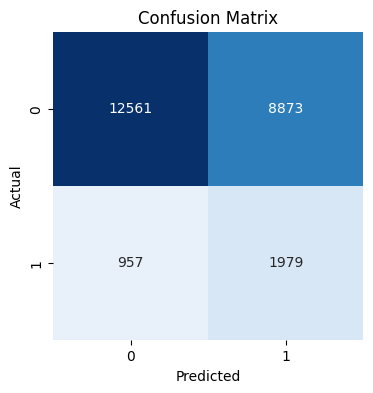

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.93      0.59      0.72     21434
           1       0.18      0.67      0.29      2936

    accuracy                           0.60     24370
   macro avg       0.56      0.63      0.50     24370
weighted avg       0.84      0.60      0.67     24370



In [35]:


cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

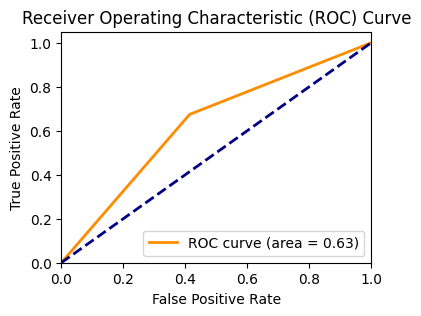

In [36]:

get_roc_auc(y_test, y_pred)

Accuracy (none): 87.83%


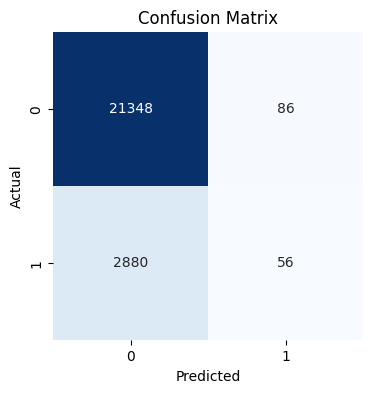

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     21434
           1       0.39      0.02      0.04      2936

    accuracy                           0.88     24370
   macro avg       0.64      0.51      0.49     24370
weighted avg       0.82      0.88      0.83     24370



In [9]:
evaluate_model(model, 'none', X_test, y_test)

In [10]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


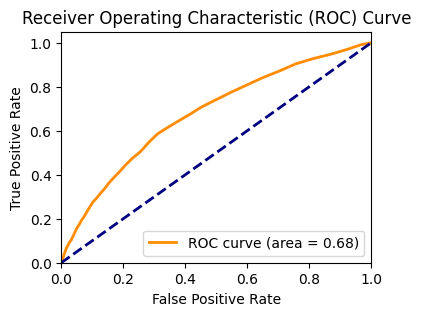

In [12]:
get_roc_auc(y_test, predicted_proba_random_forest)

Accuracy (none): 66.18%


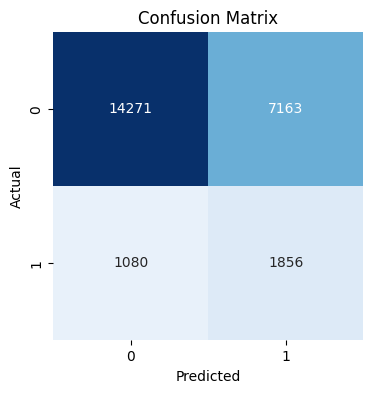

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.93      0.67      0.78     21434
           1       0.21      0.63      0.31      2936

    accuracy                           0.66     24370
   macro avg       0.57      0.65      0.54     24370
weighted avg       0.84      0.66      0.72     24370



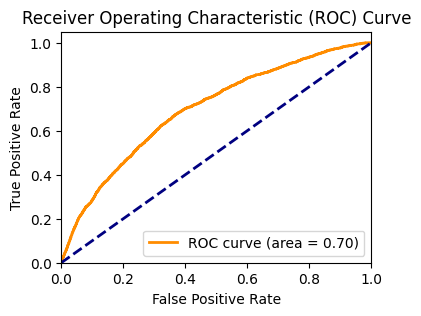

In [12]:
model_logistics = LogisticRegression(
    class_weight={
        0: 1,
        1: 7.5
    }
)

model_logistics.fit(X_train, y_train)

evaluate_model(model_logistics, 'none', X_test, y_test)
predicted_proba_logistics = model_logistics.predict_proba(X_test)
predicted_proba_logistics = predicted_proba_logistics[:,1]

get_roc_auc(y_test, predicted_proba_logistics)

In [13]:
roc_auc_score(y_test, predicted_proba_logistics)

0.6970930454657209

In [14]:
'''from sklearn.svm import SVC
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

evaluate_model(model_svm, 'none', X_test, y_test)
predicted_proba_svm = model_svm.predict_proba(X_test)
predicted_proba_svm = predicted_proba_svm[:,1]

get_roc_auc(y_test, predicted_proba_svm)'''

"from sklearn.svm import SVC\nmodel_svm = SVC(kernel='linear')\nmodel_svm.fit(X_train, y_train)\n\nevaluate_model(model_svm, 'none', X_test, y_test)\npredicted_proba_svm = model_svm.predict_proba(X_test)\npredicted_proba_svm = predicted_proba_svm[:,1]\n\nget_roc_auc(y_test, predicted_proba_svm)"

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Accuracy (none): 67.14%


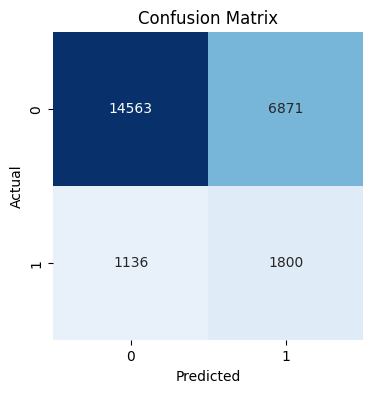

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.93      0.68      0.78     21434
           1       0.21      0.61      0.31      2936

    accuracy                           0.67     24370
   macro avg       0.57      0.65      0.55     24370
weighted avg       0.84      0.67      0.73     24370



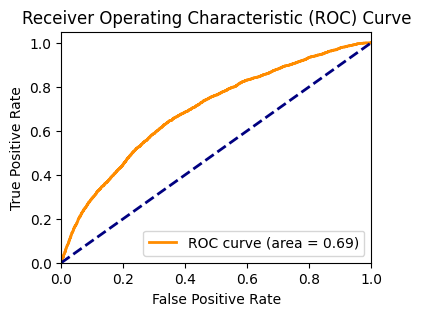

In [16]:
model_logistics = LogisticRegression(
    class_weight={
        0: 1,
        1: 1    }
)

model_logistics.fit(X_train_resampled, y_train_resampled)

evaluate_model(model_logistics, 'none', X_test, y_test)
predicted_proba_logistics = model_logistics.predict_proba(X_test)
predicted_proba_logistics = predicted_proba_logistics[:,1]

get_roc_auc(y_test, predicted_proba_logistics)

In [34]:
feature_importance = model_logistics.coef_[0]

coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_importance})
coefficients_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
6,Max_DPD_L3m,0.554343
1,Max_Perc_Def_Chg_Pending,0.370062
30,Total_Field_Trails_1.0,0.183210
4,Perc_Repay_Fail,0.172188
31,Total_Field_Trails_2.0,0.150012
26,N_PosBkt_L3m_1.0,0.129099
32,Total_Field_Trails_3.0,0.114649
9,N_Enq_L9m,0.104068
12,N_Default_L3m_1,0.092747
13,N_Default_L3m_2,0.087817


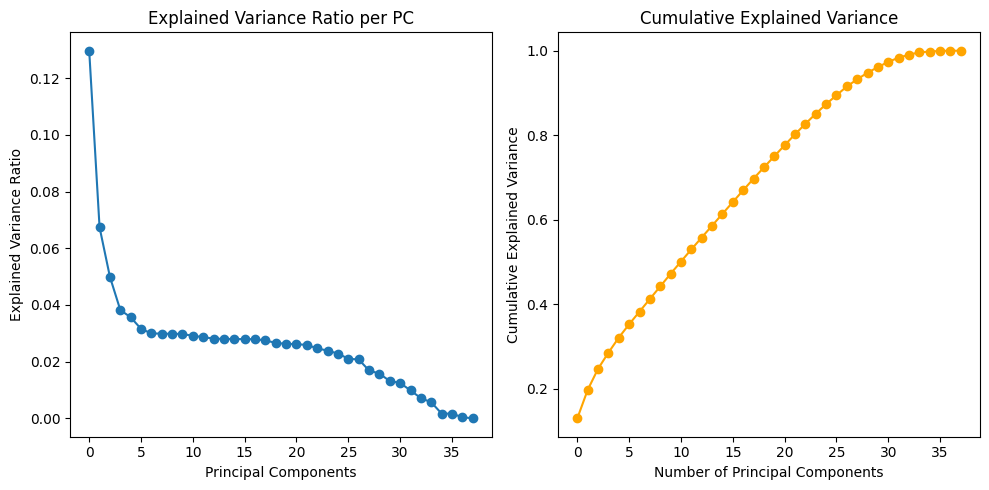

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_train)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per PC')

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


In [36]:



pca.fit(X_train)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain a desired amount of variance (e.g., 95%)
desired_variance = 0.95  # You can adjust this threshold as needed
n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance * 100}% variance: {n_components}")


Number of components to explain 95.0% variance: 30


In [37]:
# Create a PCA instance
pca = PCA(n_components=30)  # You can change the number of components

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_train)


In [39]:
X_test_pca = pca.fit_transform(X_test)

Accuracy (none): 63.04%


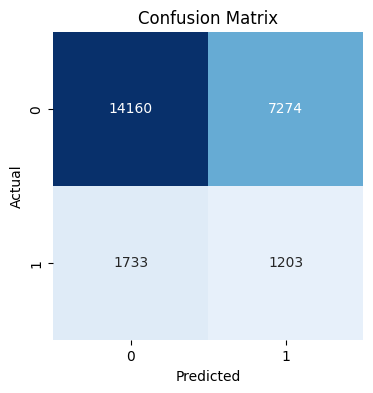

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.89      0.66      0.76     21434
           1       0.14      0.41      0.21      2936

    accuracy                           0.63     24370
   macro avg       0.52      0.54      0.48     24370
weighted avg       0.80      0.63      0.69     24370



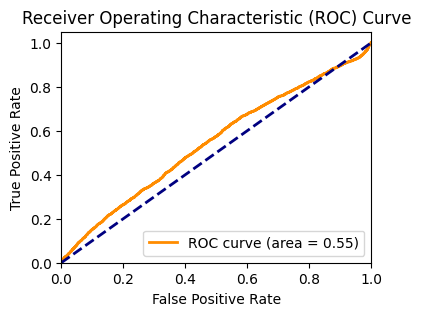

In [42]:
model_logistics_PCA = LogisticRegression(
    class_weight={
        0: 1,
        1: 1
    }
)

model_logistics_PCA.fit(X_pca, y_train)

evaluate_model(model_logistics_PCA, 'none', X_test_pca, y_test)
predicted_proba_logistics_PCA = model_logistics_PCA.predict_proba(X_test_pca)
predicted_proba_logistics_PCA = predicted_proba_logistics_PCA[:,1]

get_roc_auc(y_test, predicted_proba_logistics_PCA)

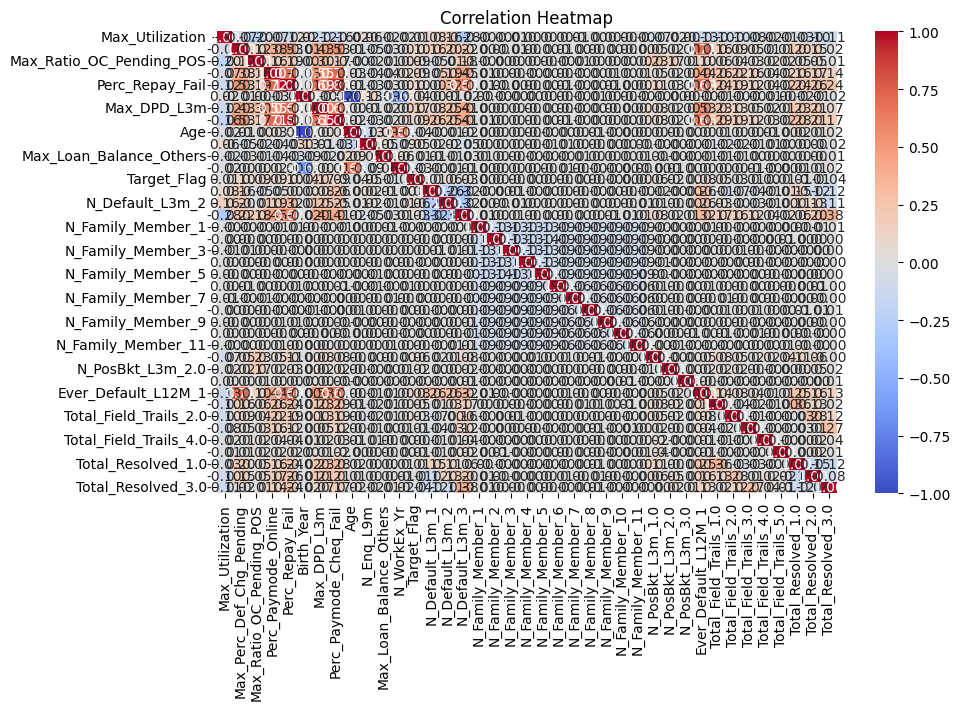

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with features
# If not, replace df with your actual DataFrame

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
